##### 1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Решил по аналогии с sklearn __заменять__ 0 и 1 на __максимально близкое__ к этим значениям число с плавающей запятой

In [2]:
def calc_logloss(y, y_pred):
    
    y_pred = y_pred.astype(float)
    
    for i in range(y_pred.shape[0]):
        if y_pred[i] <= 0:
            y_pred[i] = 0.0000000000000001
        elif y_pred[i] >= 1:
            y_pred[i] = 0.9999999999999999
                
    return - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))

__Проверяем__

In [3]:
y = np.array([1, 0])

y_pred1 = np.array([0, 1])
y_pred2 = np.array([1, 0])

calc_logloss(y, y_pred1), calc_logloss(y, y_pred2)

(36.78908102879092, 1.1102230246251565e-16)

##### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

__Генерируем датасет__

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

__Стандартизируем выбоку__

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
standart_X = calc_std_feat(X)
standart_X

array([[-0.50201588, -0.50201588, -0.50201588, -0.50201588, -0.50201588,
        -0.50201588, -0.50201588, -0.50201588, -0.50201588, -0.50201588],
       [-0.50201588, -0.50201588, -0.49995907, -0.50201588, -0.49790226,
        -0.50407269, -0.49378864, -0.48350459, -0.50201588, -0.49995907],
       [ 0.52433227,  0.93569425,  1.03853475,  0.73001326,  2.4783017 ,
         1.14137525,  2.58114219,  3.60954715,  0.42149177,  1.55273723],
       [-0.50201588, -0.50201588, -0.49995907, -0.50201588, -0.49995907,
        -0.50201588, -0.49790226, -0.49790226, -0.50201588, -0.49995907]])

__Обучаем модель__

In [7]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [8]:
def eval_model(X, y, iterations, alpha=1e-4):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    ww = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        
        errors.append(err)
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    
    errors = np.array(errors)
    
    return errors, W

In [9]:
model = eval_model(
    X=standart_X,
    y=y,
    iterations=6000,
    alpha=1e-2
)

model[0][-2:]

600 [ 0.41842182 -0.21992301  0.47019999  1.44573103] 0.6949637595265185
1200 [ 0.33979137 -0.30132763  0.40995062  1.3682635 ] 0.691196973193927
1800 [ 0.2802578  -0.36338658  0.3649515   1.30994248] 0.6890443169919596
2400 [ 0.23546109 -0.41051925  0.33114523  1.26639574] 0.687823992927346
3000 [ 0.20185877 -0.44631366  0.30580414  1.23407172] 0.6871358996060832
3600 [ 0.17671164 -0.47354417  0.28683803  1.21022426] 0.6867492354066389
4200 [ 0.15792658 -0.49433083  0.27265847  1.19275493] 0.6865323725371699
4800 [ 0.14391626 -0.51028135  0.26206561  1.18007236] 0.6864108112284383
5400 [ 0.13348298 -0.52260883  0.25415666  1.17097584] 0.6863426016919705
6000 [ 0.12572609 -0.53222549  0.24825418  1.16456246] 0.6863042058607933


array([0.68630425, 0.68630421])

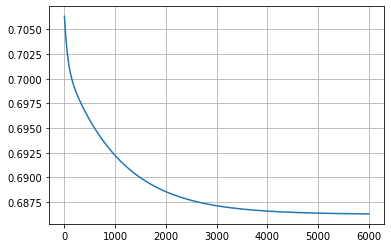

In [10]:
plt.plot(range(model[0].shape[0]),model[0])

plt.grid()
plt.show()

__log_loss__ минимален при __alpha = 1e-2__ и количестве __итераций = 6000__

##### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [11]:
def cals_pred_proba(W, X):
    
    y_pred_proba = 1 / (1 + np.exp(-np.dot(W, X)))
    
    return y_pred_proba

__Просматриваем результат__

In [12]:
cpp = cals_pred_proba(model[1], standart_X)
cpp

array([0.43772701, 0.46300034, 0.46967763, 0.45033163, 0.55845521,
       0.47599002, 0.56479151, 0.62491521, 0.43145369, 0.5015536 ])

##### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [13]:
def y_pred(W, X):
    
    y_pred = cals_pred_proba(W, X)

    for i in range(y_pred.shape[0]):
        if y_pred[i] > 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    
    return y_pred

__Просматриваем результат__

In [14]:
cp = y_pred(model[1], standart_X)
cp

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 1.])

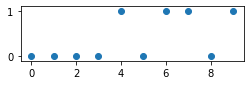

In [15]:
plt.figure(figsize=(4,1))
plt.scatter(range(cp.shape[0]), cp)
plt.show()

##### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

__Accuracy__

In [16]:
def accuracy(y, y_pred):
    
    acc = (y_pred == y).sum()/cp.shape[0]
    
    return acc

In [17]:
accuracy(y=y, y_pred=cp)

0.7

__Матрица ошибок__

In [18]:
def error_matrix(y, y_pred):
    
    TP = y * y_pred
    FP = y_pred - TP
    FN = y - TP
    TN = y**0 - TP - FP - FN
    
    return np.array([[TP.sum(), FP.sum()], 
                     [FN.sum(), TN.sum()]])

In [19]:
em = error_matrix(y=y, y_pred=cp)
em

array([[3., 1.],
       [2., 4.]])

__точность__

In [20]:
def precision(em):
    return em[0,0]/(em[0,0]+em[0,1])

In [21]:
precision(em)

0.75

__полнота__

In [22]:
def recall(em):
    return em[0,0]/(em[0,0]+em[1,0])

In [23]:
recall(em)

0.6

__F1 score__

In [24]:
def F1_score(em):
    pre = precision(em)
    rec = recall(em)
    return (2*pre*rec)/(pre+rec)

In [25]:
F1_score(em)

0.6666666666666665

##### 6. Могла ли модель переобучиться? Почему?

Модель может переобучиться потому, что: 
- мы оценили приблизительное количество итераций
- так же небыло использовано  минимальное значение
- в исходной матрице малое количество объектов, из за чего обучение происходит быстрее
- не были использовани $L_1$ или $L_2$ регуляции

##### 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [26]:
def eval_model_l1(X, y, iterations, lambda_, alpha=1e-4):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    ww = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + (lambda_/2)*np.sum(np.abs(W))) # <- l1
        
        errors.append(err)
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    
    errors = np.array(errors)
    
    return errors, W

Попробуем обучить модель с __$L_1$__ регуляцией

In [27]:
model_l1 = eval_model_l1(
    X=standart_X,
    y=y,
    iterations=6000,
    alpha=1e-2,
    lambda_=1e-2
)

model_l1[0][-2:]

600 [ 0.34789759 -0.29027786  0.41367404  1.37524741] 0.6915442275669355
1200 [ 0.22289363 -0.41766869  0.31938916  1.25149068] 0.6875627096610113
1800 [ 0.13383641 -0.50872391  0.25299359  1.16375694] 0.6863618554385126
2400 [ 0.0707251  -0.5735537   0.20611078  1.10202343] 0.6863442904466605
3000 [ 0.02608669 -0.61971104  0.17304812  1.05880147] 0.6867514187044965
3600 [-0.0055041  -0.65267906  0.1497079   1.0286545 ] 0.6872494580604228
4200 [-0.02878385 -0.6772336   0.13249893  1.00683844] 0.6877274456914868
4800 [-0.0463455  -0.69599288  0.11955575  0.99075548] 0.688149414771267
5400 [-0.05961924 -0.71040606  0.10981129  0.97897176] 0.6885025501254595
6000 [-0.06967916 -0.72156153  0.10246231  0.97041039] 0.6887889903088202


array([0.68878856, 0.68878899])

Просмотрим результат на графике

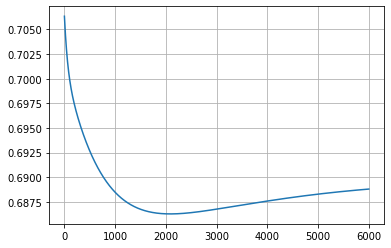

In [28]:
plt.plot(range(model_l1[0].shape[0]),model_l1[0])

plt.grid()
plt.show()

Видно что с добавлением количества итераций увеличивается ошибка

In [29]:
def eval_model_l2(X, y, iterations, lambda_, alpha=1e-4):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    ww = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + (lambda_/2)*np.sum(W**2)) # <- l2
        
        errors.append(err)
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    
    errors = np.array(errors)
    
    return errors, W

Теперь обучим модель с __$L_2$__ регуляцией

In [30]:
model_l2 = eval_model_l2(
    X=standart_X,
    y=y,
    iterations=6000,
    alpha=1e-2,
    lambda_=1e-2
)

model_l2[0][-2:]

600 [ 0.34802398 -0.29014809  0.41391855  1.37537455] 0.6915503001832533
1200 [ 0.22971338 -0.41086154  0.3248774   1.25830736] 0.6877110615949367
1800 [ 0.14783098 -0.49478707  0.26386458  1.17773855] 0.6864586949777618
2400 [ 0.09035399 -0.55405283  0.22112551  1.1216245 ] 0.6862740511693094
3000 [ 0.04952831 -0.59648565  0.19082139  1.08219699] 0.6864929784408138
3600 [ 0.02025573 -0.62723495  0.16913084  1.05434785] 0.6868291139396396
4200 [-8.98645904e-04 -6.49771829e-01  1.53486336e-01  1.03463516e+00] 0.687164805447611
4800 [-0.01629407 -0.66648133  0.14212771  1.02069469] 0.6874575503309226
5400 [-0.02757525 -0.67902664  0.13382947  1.01087814] 0.6876974499648454
6000 [-0.03590184 -0.68858066  0.12772834  1.0040233 ] 0.6878877844788239


array([0.6878875 , 0.68788778])

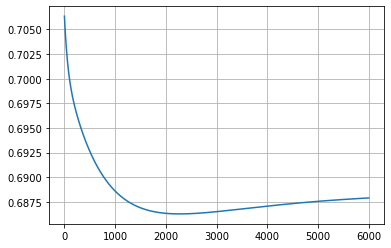

In [31]:
plt.plot(range(model_l2[0].shape[0]),model_l2[0])

plt.grid()
plt.show()

В сравнении с $L_1$, $L_2$ добавляет меньшую ошибку